# **Multivariate Time Series Analysis of Pulse Price Indices in Uttar Pradesh**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel("Pulses.xlsx")

In [5]:
df

,Sr.No.,Item,Arhar Dal,Urd Dal,Masur Dal,Pea Dal,Moong Dal,Gram: Dal
0,1,2016-07-16,230.894697,234.975548,188.437160,162.844198,161.602640,196.392282
1,2,2016-08-17,223.625935,230.970014,190.968460,163.670122,157.455580,225.255081
2,3,2016-09-18,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261
3,4,2016-10-20,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669
4,5,2016-11-21,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424
...,...,...,...,...,...,...,...,...
95,142,2024-06-20,258.002229,203.417441,200.360280,256.989846,181.146412,187.869116
96,145,2024-07-22,265.040621,203.492264,199.880952,257.479599,177.933473,189.728768
97,146,2024-08-23,266.233694,206.759887,200.248280,255.521752,179.725994,192.946894
98,147,2024-09-24,267.703388,207.210875,199.436864,253.958853,181.919484,198.482426


In [6]:
df.drop(["Sr.No."],axis=1, inplace=True)

In [7]:
df.head()

,Item,Arhar Dal,Urd Dal,Masur Dal,Pea Dal,Moong Dal,Gram: Dal
0,2016-07-16,230.894697,234.975548,188.437160,162.844198,161.602640,196.392282
1,2016-08-17,223.625935,230.970014,190.968460,163.670122,157.455580,225.255081
2,2016-09-18,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261
3,2016-10-20,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669
4,2016-11-21,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424


In [8]:
df.tail()

,Item,Arhar Dal,Urd Dal,Masur Dal,Pea Dal,Moong Dal,Gram: Dal
95,2024-06-20,258.002229,203.417441,200.360280,256.989846,181.146412,187.869116
96,2024-07-22,265.040621,203.492264,199.880952,257.479599,177.933473,189.728768
97,2024-08-23,266.233694,206.759887,200.248280,255.521752,179.725994,192.946894
98,2024-09-24,267.703388,207.210875,199.436864,253.958853,181.919484,198.482426
99,2024-10-26,264.071989,207.905076,200.252475,249.507001,181.513229,203.418103


In [9]:
df.columns=["date","Arhar","Urd","Masur","Pea","Moong","Gram"]

In [10]:
df.shape

(100, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    100 non-null    datetime64[ns]
 1   Arhar   100 non-null    float64       
 2   Urd     100 non-null    float64       
 3   Masur   100 non-null    float64       
 4   Pea     100 non-null    float64       
 5   Moong   100 non-null    float64       
 6   Gram    100 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.6 KB


In [12]:
df.describe()

,date,Arhar,Urd,Masur,Pea,Moong,Gram
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2020-08-30 03:50:24,166.074934,167.634587,161.698237,212.225894,146.365655,170.484548
min,2016-07-16 00:00:00,107.796002,115.038859,120.589876,126.099209,108.162965,142.111137
25%,2018-08-09 00:00:00,126.115401,137.854228,135.196115,160.659074,120.693401,152.028949
50%,2020-09-01 00:00:00,163.217068,177.963852,158.297982,225.441087,155.715501,164.511214
75%,2022-09-26 00:00:00,181.837752,187.452343,187.812145,256.131603,161.277936,177.661663
max,2024-10-26 00:00:00,267.703388,234.975548,200.360280,266.304692,181.919484,283.962691
std,NaN,45.865541,30.610710,26.510188,50.571342,22.924073,27.462260


In [13]:
df.set_index("date" , inplace = True)

In [14]:
df = df.resample('MS').sum()  # 'MS' = Month Start.

In [15]:
df.head()

,Arhar,Urd,Masur,Pea,Moong,Gram
date,,,,,,
2016-07-01,230.894697,234.975548,188.437160,162.844198,161.602640,196.392282
2016-08-01,223.625935,230.970014,190.968460,163.670122,157.455580,225.255081
2016-09-01,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261
2016-10-01,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669
2016-11-01,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424


# **Exploratory Data Analysis**

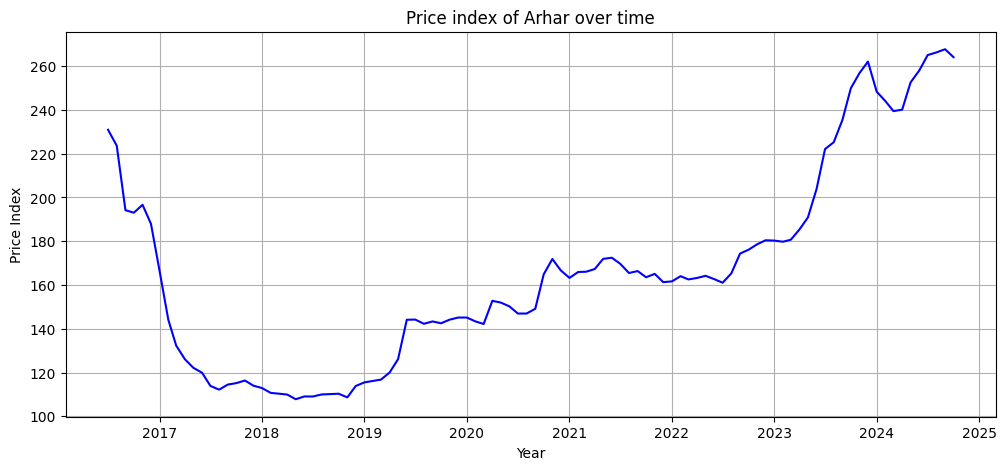

In [16]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Arhar"],color="blue",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Arhar over time")
plt.grid(True)
plt.show()

**Arhar series doesn't seem stationary, it has decreasing trend from 2016 to early 2019 & increasing trend from 2019 to 2024.**

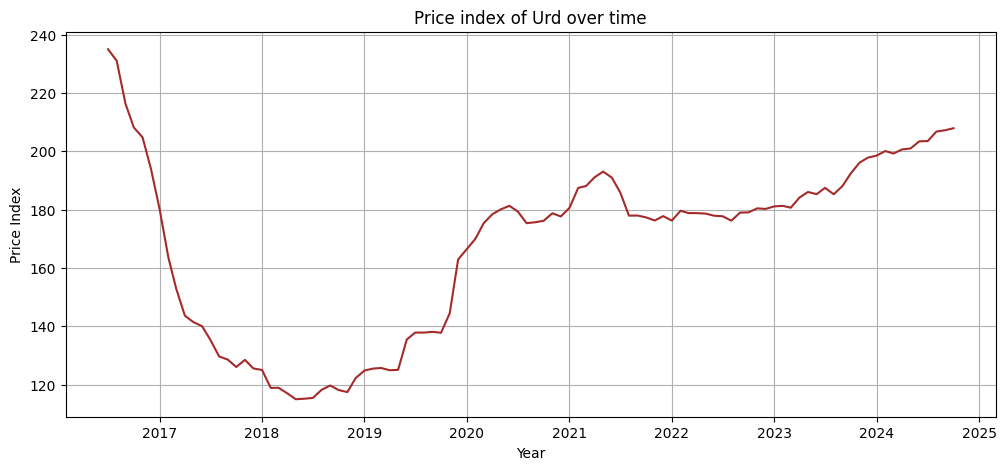

In [17]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Urd"],color="brown",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Urd over time")
plt.grid(True)
plt.show()

**Urd series also doesn't seem stationary, it has decreasing trend from 2016 to 2019 & increasing trend from 2019 to 2024.**

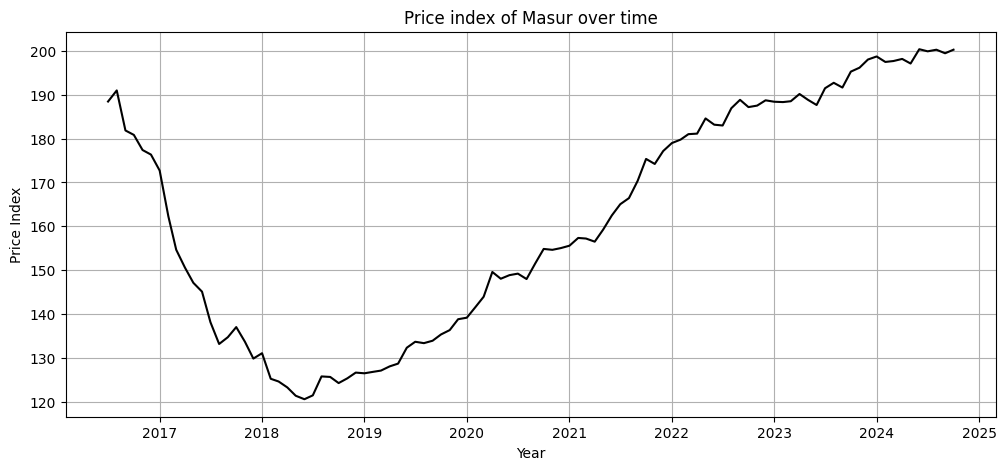

In [18]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Masur"],color="black",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Masur over time")
plt.grid(True)
plt.show()

**Masur series also doesn't seem stationary, it has decreasing trend from 2016 to 2019 & increasing trend from 2019 to 2024 same as Urd.**

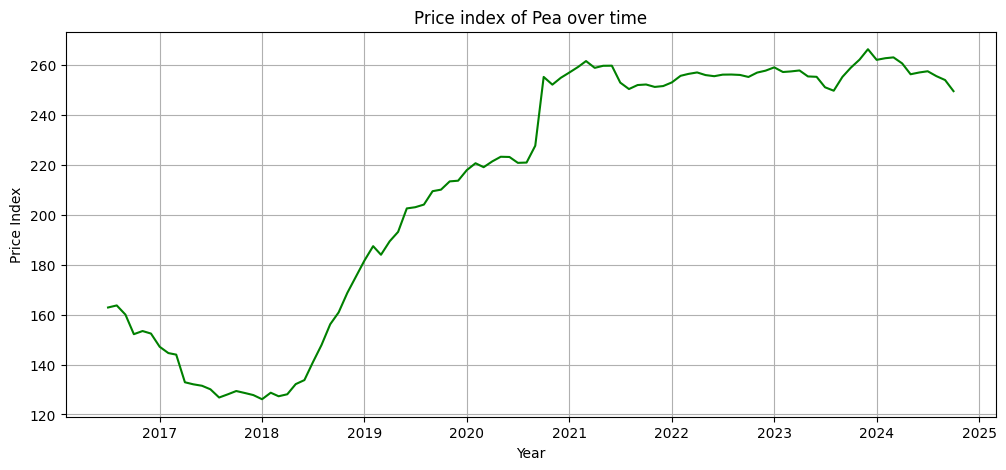

In [19]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Pea"],color="green",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Pea over time")
plt.grid(True)
plt.show()

**Pea series doesn't seem stationary, it has somewhat increasing trend.**

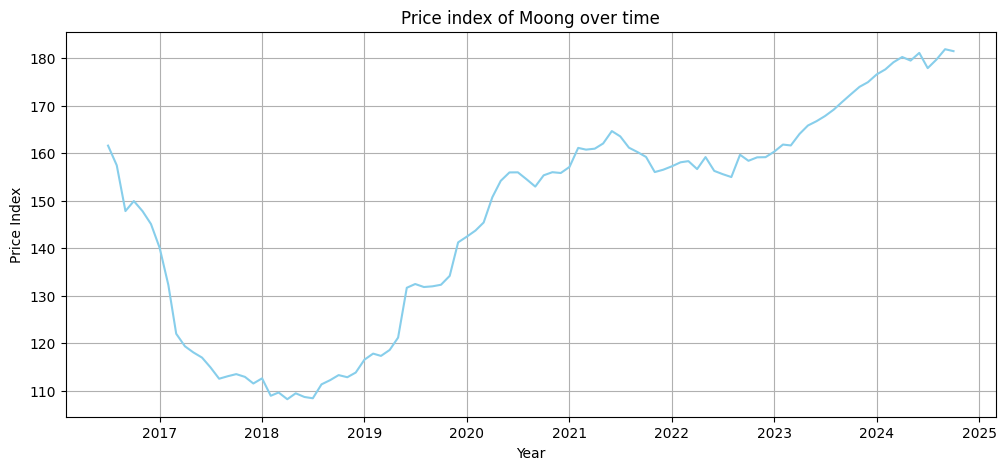

In [20]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Moong"],color="skyblue",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Moong over time")
plt.grid(True)
plt.show()

**Trend same as Urd and Masur.**

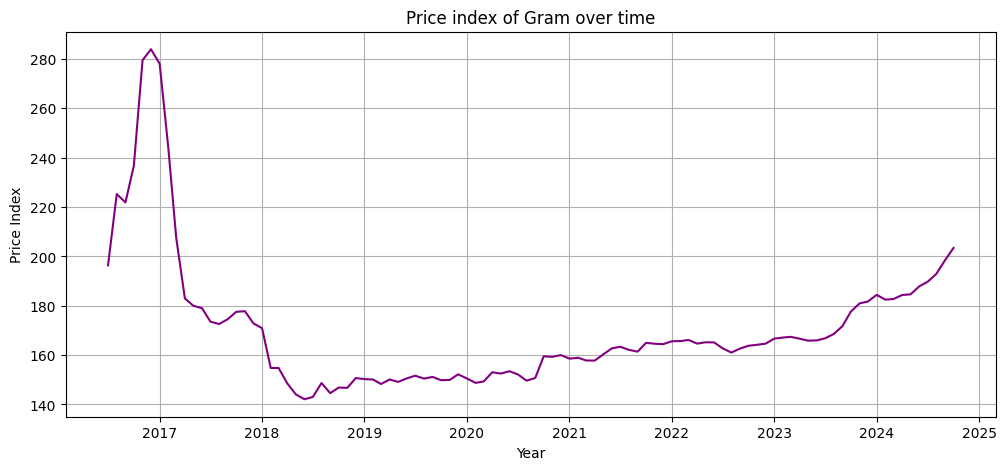

In [21]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df.index,df["Gram"],color="purple",label="Initial plot")
ax.set_xlabel("Year")
ax.set_ylabel("Price Index")
ax.set_title("Price index of Gram over time")
plt.grid(True)
plt.show()

**Gram series has increasing trend till 2017, after that it has decreasing trend till 2019 and 2019 onwards it seems stationary with very minor increasing behaviour after 2023.**

# **Univariate Time Series Analysis**

## **Arhar Dal**

### **Decomposition of the Series**

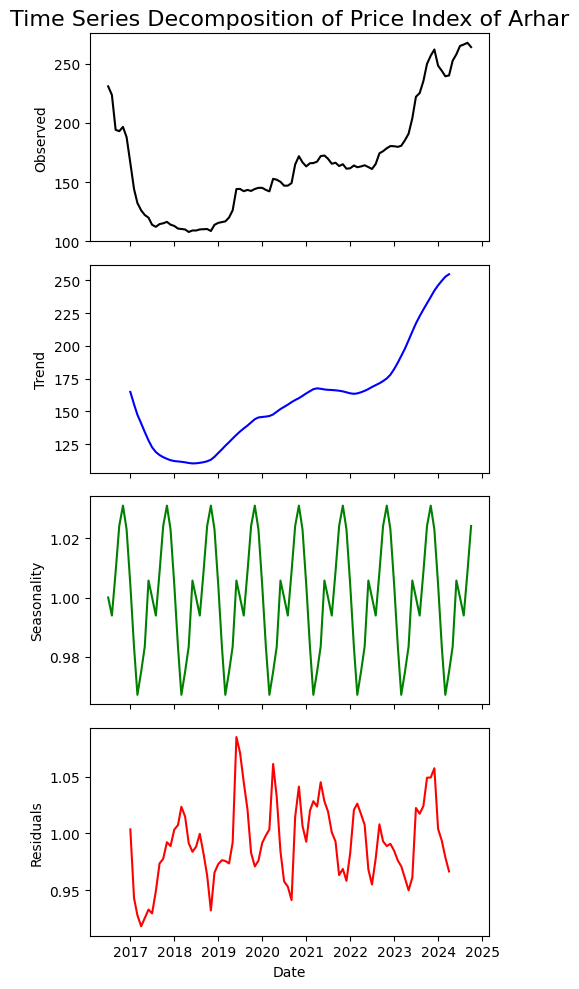

In [22]:
# Decompose the series
from statsmodels.tsa.seasonal import STL , seasonal_decompose
result = seasonal_decompose(df['Arhar'], model='multiplicative', period=12)

# Custom large plots
fig, axes = plt.subplots(4, 1, figsize=(5, 10), sharex=True)

# Plot observed
axes[0].plot(result.observed, color='black')
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition of Price Index of Arhar", fontsize=16)

# Plot trend
axes[1].plot(result.trend, color='blue')
axes[1].set_ylabel("Trend")

# Plot seasonal
axes[2].plot(result.seasonal, color='green')
axes[2].set_ylabel("Seasonality")

# Plot residual
axes[3].plot(result.resid, color='red')
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Date")

plt.tight_layout()
plt.show()

**Clear increasing trend present in the series along with seasonality**

### **Seasonality Confirmation**

In [23]:
import plotly.express as px
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Arhar'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()


 **Periodogram shows no significant spikes, it suggests that time series lacks strong seasonal patterns**

A periodogram plots:

Frequency (x-axis): how many cycles per unit time

Amplitude / Power (y-axis): how strong that cycle is

It's a way of detecting regular, hidden cycles in your data that are not always visible in time-domain plots.

### **ADF Test For Stationarity**

In [24]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Arhar'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.730498
p-value: 0.838691


**ADF test rejects the stationarity of the series**

### **Differencing the Series**

In [25]:
df['Arhar_diff'] = df['Arhar'].diff()
df.dropna(inplace=True)


In [26]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Arhar_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.660620
p-value: 0.000001


**Now the differenced series of Arhar is Stationary.**

### **ACF PLOT**

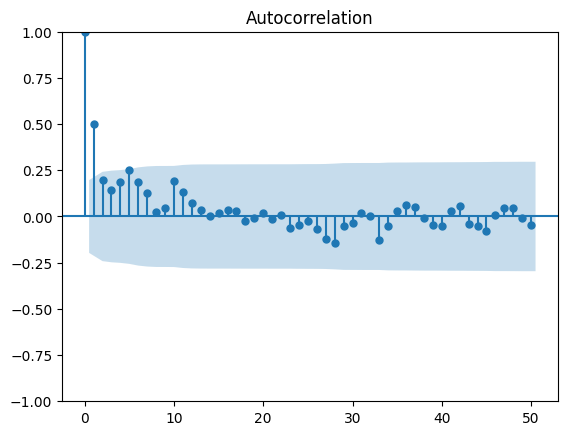

In [27]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Arhar_diff'],lags=50)
plt.show()

**It is suggesting MA(1) process but plot is having some sinusoidal nature so going for the PACF plot.**

### **PACF PLOT**

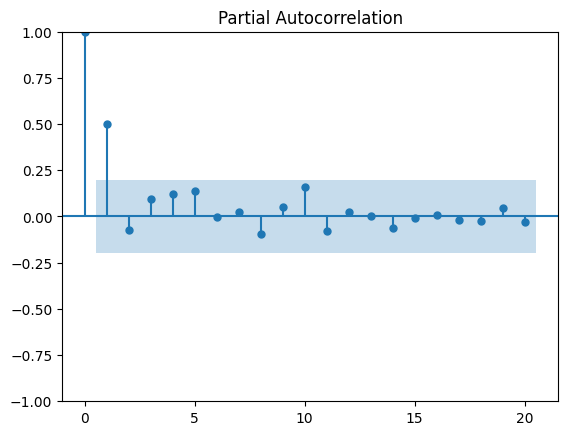

In [28]:
# pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Arhar_diff'])
plt.show()

**It is suggesting that series should be purely AR(1).**

### **Train Test Split**

In [29]:
# spliting
train = df[:int(0.95*(len(df)))]
test = df[int(0.95*(len(df))):]

In [30]:
train

,Arhar,Urd,Masur,Pea,Moong,Gram,Arhar_diff
date,,,,,,,
2016-08-01,223.625935,230.970014,190.968460,163.670122,157.455580,225.255081,-7.268762
2016-09-01,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261,-29.456478
2016-10-01,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669,-1.162384
2016-11-01,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424,3.615852
2016-12-01,187.941415,193.962837,176.344135,152.402999,145.082043,283.962691,-8.681510
...,...,...,...,...,...,...,...
2024-01-01,248.350417,198.528976,198.709219,262.048403,176.602868,184.403925,-13.693042
2024-02-01,244.000433,200.079734,197.461367,262.702250,177.669340,182.482572,-4.349984
2024-03-01,239.425140,199.222410,197.670794,263.036473,179.172451,182.717187,-4.575293


### **Model Fitting**

In [31]:
# fitting ARIMA(1,1,0)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Arhar'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Arhar   No. Observations:                   94
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -299.679
Date:                Sat, 16 Aug 2025   AIC                            603.357
Time:                        04:58:16   BIC                            608.422
Sample:                    08-01-2016   HQIC                           605.402
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5697      0.050     11.413      0.000       0.472       0.668
sigma2        36.6907      3.554     10.323      0.000      29.724      43.657
Ljung-Box (L1) (Q):                   0.35   Jarque-

In [32]:
pred=model_fit.predict(start=len(train),end=len(df)-1)
mape=np.mean(np.abs(pred-test['Arhar'])/np.abs(test['Arhar']))
mape

np.float64(0.005795225857137619)

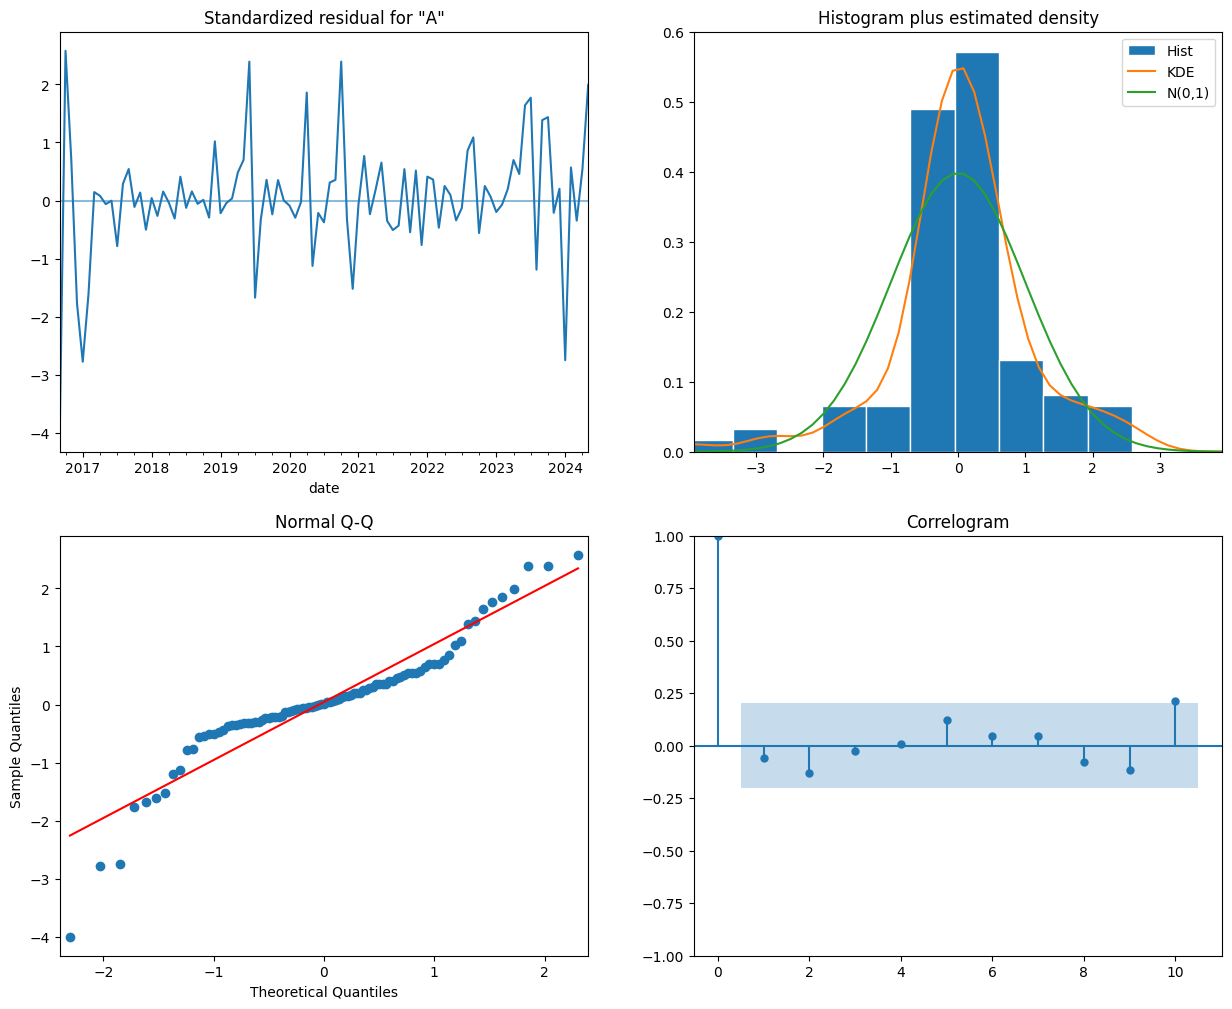

In [33]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [34]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,1.636778,0.200768
2,1.937367,0.379582
3,1.962978,0.580126
4,2.158166,0.706695
5,2.578710,0.764597
6,2.755441,0.838856
7,2.756210,0.906602
8,2.760630,0.948470
9,2.776845,0.972489
10,2.788664,0.985969


### **Best Model Selection**

In [35]:
l=[]
import warnings
warnings.filterwarnings('ignore')
def models(p,q):
    model = ARIMA(train['Arhar'], order=(p,1,q))
    m=model.fit()
    l.append([[(p,1,q)],m.aic,np.mean(np.abs(m.predict(start=len(train),end=len(df)-1)-test['Arhar'])/np.abs(test['Arhar']))])



In [36]:
from itertools import product
p = range(0, 13)
q = range(0, 13)

In [37]:
for p,q in product(p,q):
   models(p,q)

In [38]:
d=pd.DataFrame(l,columns=["Model","AIC","MAPE"])
data=d.sort_values(by="AIC",ascending=True)
data.head(10)

,Model,AIC,MAPE
93,"[(7, 1, 2)]",598.123935,0.055872
98,"[(7, 1, 7)]",598.269856,0.047907
95,"[(7, 1, 4)]",599.933287,0.062962
69,"[(5, 1, 4)]",600.082719,0.041373
119,"[(9, 1, 2)]",600.497575,0.063222
11,"[(0, 1, 11)]",600.501318,0.059553
70,"[(5, 1, 5)]",600.508049,0.048768
65,"[(5, 1, 0)]",600.564551,0.041507
99,"[(7, 1, 8)]",601.412513,0.070001
15,"[(1, 1, 2)]",601.632052,0.009047


**Selecting ARIMA(1,1,2) as best model as it is good in both aspects that is AIC and MAPE. Also it is comparatively simpler model.**

In [39]:
model = ARIMA(train['Arhar'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Arhar   No. Observations:                   94
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -296.816
Date:                Sat, 16 Aug 2025   AIC                            601.632
Time:                        05:00:50   BIC                            611.762
Sample:                    08-01-2016   HQIC                           605.722
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9640      0.047     20.505      0.000       0.872       1.056
ma.L1         -0.3653      0.140     -2.604      0.009      -0.640      -0.090
ma.L2         -0.4006      0.128     -3.123      0.0

### **Best Model Diagnostics**

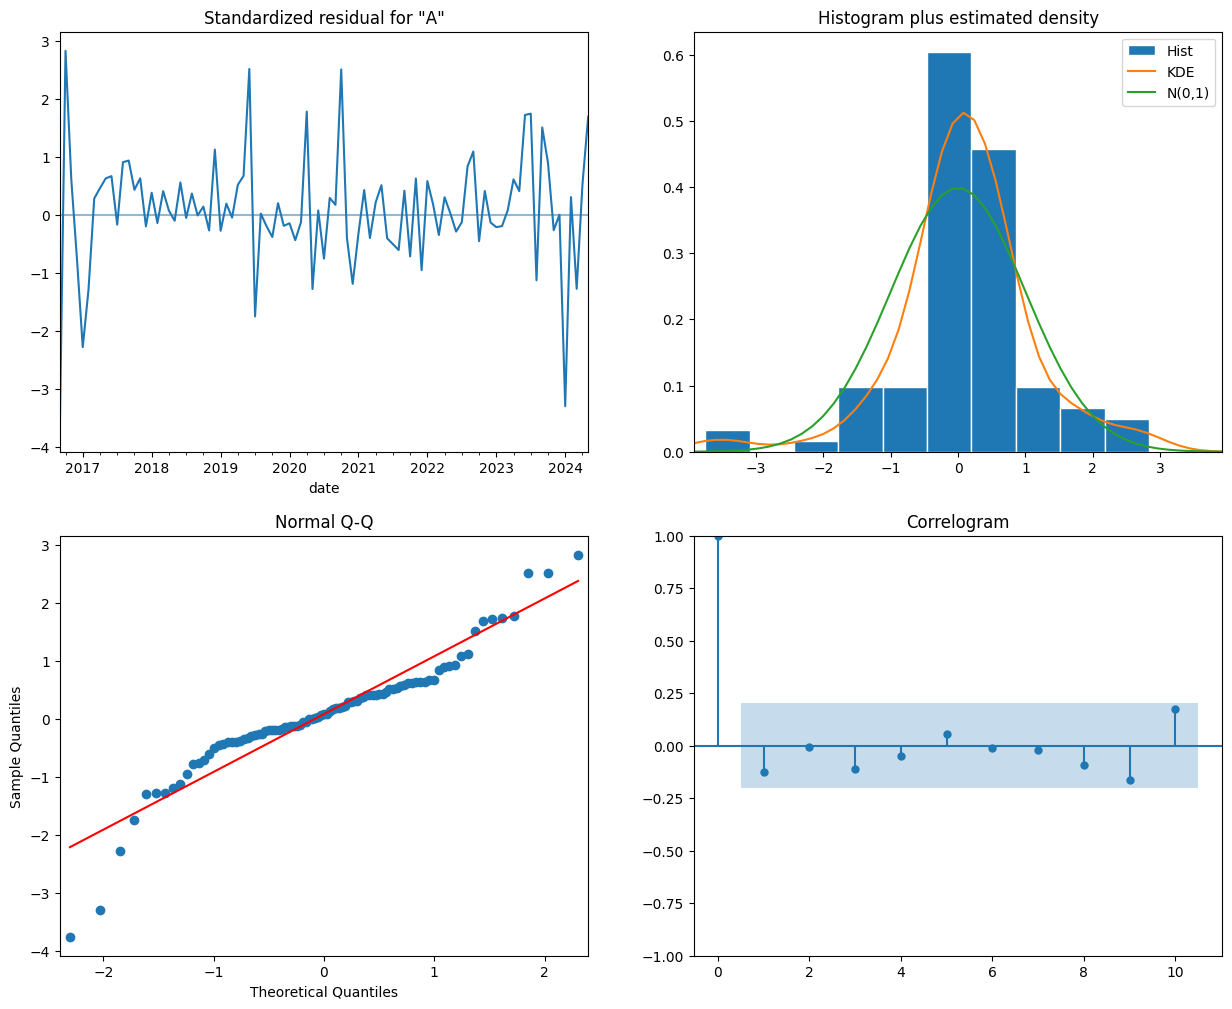

In [40]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

**According to the qualitative analysis, residuals resemble white noise.**

### **Ljung Box Test**

In [41]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,1.789917,0.180936
2,2.258666,0.323249
3,2.264049,0.519443
4,2.315615,0.677928
5,2.637300,0.755690
6,2.779495,0.835970
7,2.779554,0.904619
8,2.779613,0.947418
9,2.779703,0.972392
10,2.835705,0.985030


**Ljung box test confirms that model is ready for forecasting.**

In [42]:
# Predict on training data (in-sample fit)
train_preds = model_fit.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = model_fit.forecast(steps=len(test))


In [43]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['Arhar'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['Arhar'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted Arhar Prices (Train & Test)',
    xaxis_title='Date',
    yaxis_title='Arhar Price Index'
)

fig.show()


### **Forecasting for a year by ARIMA(1,1,2) Model**

In [44]:
# forecasting for a year by arima
start_date = pd.to_datetime("2024-11-01")
date_range = pd.date_range(start=start_date, periods=12, freq="MS")

model = ARIMA(df['Arhar'], order=(1,1,2))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=11)
forecast_df = forecast.predicted_mean
forecast_df["Date"] = date_range
#forecast_df.set_index("Date", inplace=True)
forecast_df.index = date_range

forecast_df.head(11)

,predicted_mean
2024-11-01,262.792764
2024-12-01,263.929235
2025-01-01,265.017739
2025-02-01,266.060298
2025-03-01,267.058854
2025-04-01,268.015263
2025-05-01,268.931304
2025-06-01,269.808681
2025-07-01,270.649025
2025-08-01,271.453901


In [45]:
# graphical representation of forecasts with time stamps
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df, mode='lines', name='Observed'))
#fig.add_trace(go.Scatter(x=["11",'12','1','2','3','4','5','6','7','8','9','10'], y=m.fittedvalues, mode='lines', name='Predicted'))
fig.update_layout(title='Predicted Arhar Price Indices', xaxis_title='Date', yaxis_title='Arhar')
fig.show()


## **Urd Dal**

### **Decomposition of the series**

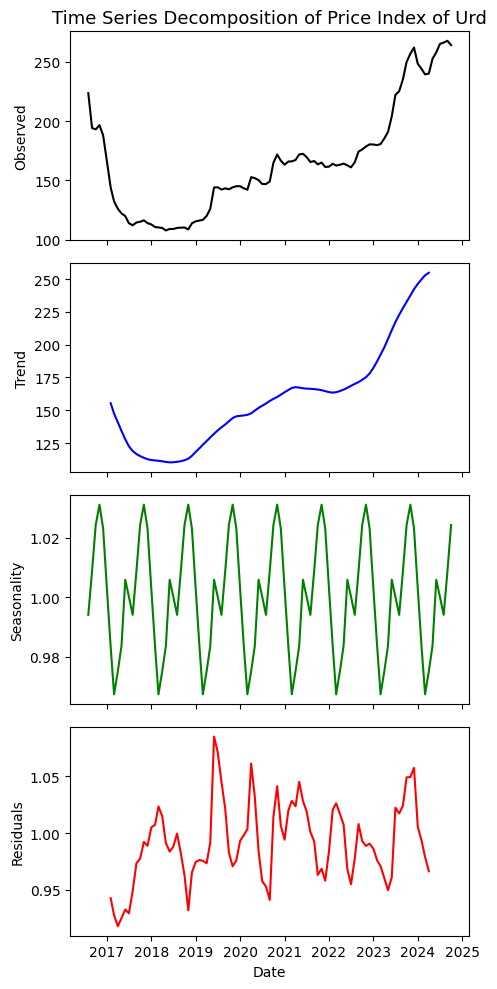

In [46]:
# Decompose the series
from statsmodels.tsa.seasonal import STL , seasonal_decompose
result = seasonal_decompose(df['Arhar'], model='multiplicative', period=12)

# Custom large plots
fig, axes = plt.subplots(4, 1, figsize=(5, 10), sharex=True)

# Plot observed
axes[0].plot(result.observed, color='black')
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition of Price Index of Urd", fontsize=13)

# Plot trend
axes[1].plot(result.trend, color='blue')
axes[1].set_ylabel("Trend")

# Plot seasonal
axes[2].plot(result.seasonal, color='green')
axes[2].set_ylabel("Seasonality")

# Plot residual
axes[3].plot(result.resid, color='red')
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Date")

plt.tight_layout()
plt.show()

**From the above decomposition we can observe the presence of an increasing trend and seasonality. To confirm the period of seasonality we plot a periodogram**

### **Seasonality Confirmation**

In [47]:
import plotly.express as px
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Urd'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()


**Similar to Arhar dal,** **Periodogram shows no significant spikes, it suggests that time series lacks strong seasonal patterns**



### **ADF test for Stationarity**

In [48]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Urd'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.230653
p-value: 0.660272


**p value indicates that the series is not stationary**

### **Differencing the series**

In [49]:
# differencing
df['Urd_diff'] = df['Urd'].diff()
df.dropna(inplace=True)


In [50]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Urd_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.306272
p-value: 0.000005


**p value of the ADF test indicates that the differenced series is stationary.**

### **ACF PLOT**

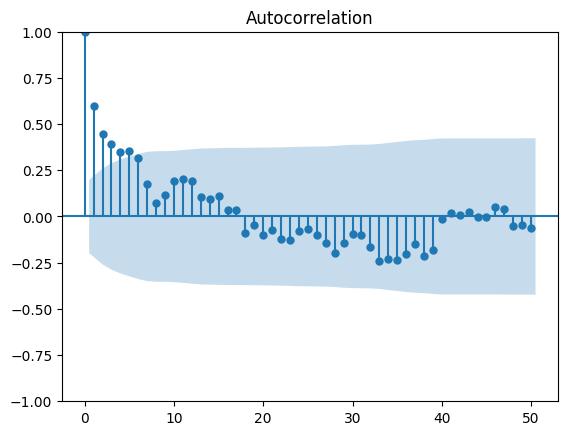

In [51]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Urd_diff'],lags=50)
plt.show()

**Clear exponential decaying pattern in ACF, so we should go for PACF plot.**

### **PACF PLOT**

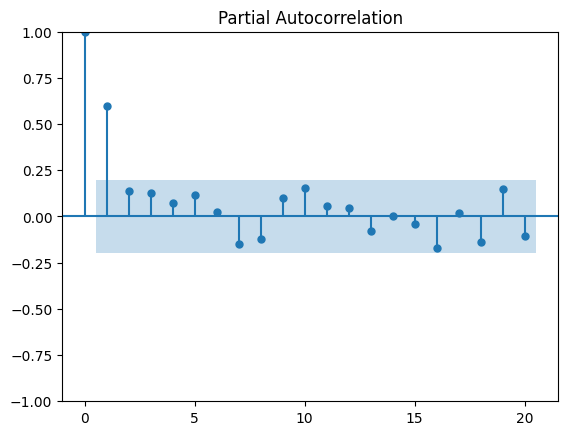

In [52]:
# pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Urd_diff'])
plt.show()

**It is indicating AR(1) process but might be a combination of both MA and AR processes.**

### **Train Test Split**

In [53]:
# spliting
train = df[:int(0.95*(len(df)))]
test = df[int(0.95*(len(df))):]

In [54]:
train

,Arhar,Urd,Masur,Pea,Moong,Gram,Arhar_diff,Urd_diff
date,,,,,,,,
2016-09-01,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261,-29.456478,-14.631458
2016-10-01,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669,-1.162384,-8.187266
2016-11-01,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424,3.615852,-3.369952
2016-12-01,187.941415,193.962837,176.344135,152.402999,145.082043,283.962691,-8.681510,-10.818502
2017-01-01,166.179839,180.103285,172.706118,147.114283,140.049311,278.086972,-21.761576,-13.859552
...,...,...,...,...,...,...,...,...
2024-01-01,248.350417,198.528976,198.709219,262.048403,176.602868,184.403925,-13.693042,0.698978
2024-02-01,244.000433,200.079734,197.461367,262.702250,177.669340,182.482572,-4.349984,1.550759
2024-03-01,239.425140,199.222410,197.670794,263.036473,179.172451,182.717187,-4.575293,-0.857324


### **Model Fitting**

In [55]:
# fitting ARIMA(1,1,1)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Urd'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Urd   No. Observations:                   93
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -247.885
Date:                Sat, 16 Aug 2025   AIC                            499.771
Time:                        05:00:51   BIC                            504.814
Sample:                    09-01-2016   HQIC                           501.806
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6214      0.056     11.131      0.000       0.512       0.731
sigma2        12.7509      1.343      9.494      0.000      10.119      15.383
Ljung-Box (L1) (Q):                   1.21   Jarque-

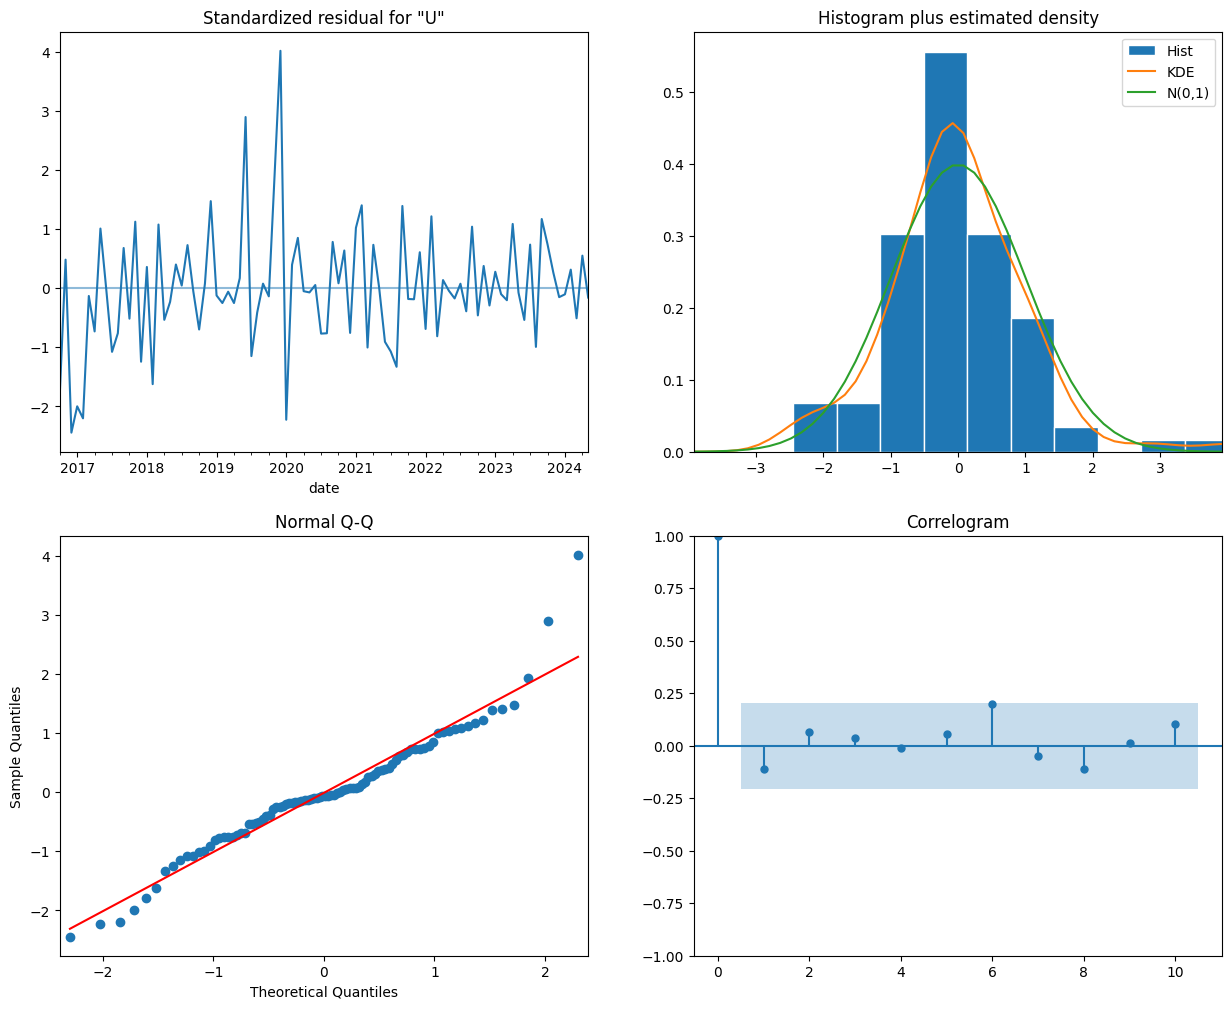

In [56]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [57]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,0.153627,0.695093
2,0.162416,0.922002
3,0.310908,0.957964
4,0.421314,0.980695
5,0.549457,0.990200
6,0.549559,0.997182
7,0.573377,0.999131
8,0.587382,0.999755
9,0.587656,0.999939
10,0.618219,0.999982


**This test shows that the residual for the model ARIMA(1,1,0) are independent and normally distributed**

### **Best Model Selection**

In [58]:
l=[]
import warnings
warnings.filterwarnings('ignore')
def models(p,q):
    model = ARIMA(train['Urd'], order=(p,1,q))
    m=model.fit()
    l.append([[(p,1,q)],m.aic,np.mean(np.abs(m.predict(start=len(train),end=len(df)-1)-test['Arhar'])/np.abs(test['Arhar']))])


In [59]:
from itertools import product
p = range(0, 13)
q = range(0, 13)

In [60]:
for p,q in product(p,q):
   models(p,q)

In [61]:
d=pd.DataFrame(l,columns=["Model","AIC","MAPE"])
data=d.sort_values(by="AIC",ascending=True)
data.head(10)

,Model,AIC,MAPE
64,"[(4, 1, 12)]",495.874708,0.224675
32,"[(2, 1, 6)]",498.657462,0.238442
14,"[(1, 1, 1)]",498.816502,0.235892
63,"[(4, 1, 11)]",499.225265,0.226633
31,"[(2, 1, 5)]",499.275463,0.237179
38,"[(2, 1, 12)]",499.296808,0.224681
90,"[(6, 1, 12)]",499.317991,0.226043
27,"[(2, 1, 1)]",499.336653,0.232664
7,"[(0, 1, 7)]",499.473170,0.237436
26,"[(2, 1, 0)]",499.524367,0.236277


**Model ARIMA(1,1,1) is better in terms of AIC and MAPE moreover offers less complexity in comparison to the model with least AIC value therefore we move forward with ARIMA(1,1,1).**

In [62]:
model = ARIMA(train['Urd'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Urd   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -246.408
Date:                Sat, 16 Aug 2025   AIC                            498.817
Time:                        05:03:26   BIC                            506.382
Sample:                    09-01-2016   HQIC                           501.870
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8173      0.099      8.232      0.000       0.623       1.012
ma.L1         -0.3340      0.149     -2.245      0.025      -0.626      -0.042
sigma2        12.3354      1.265      9.753      0.0

### **Best Model Diagnostics**

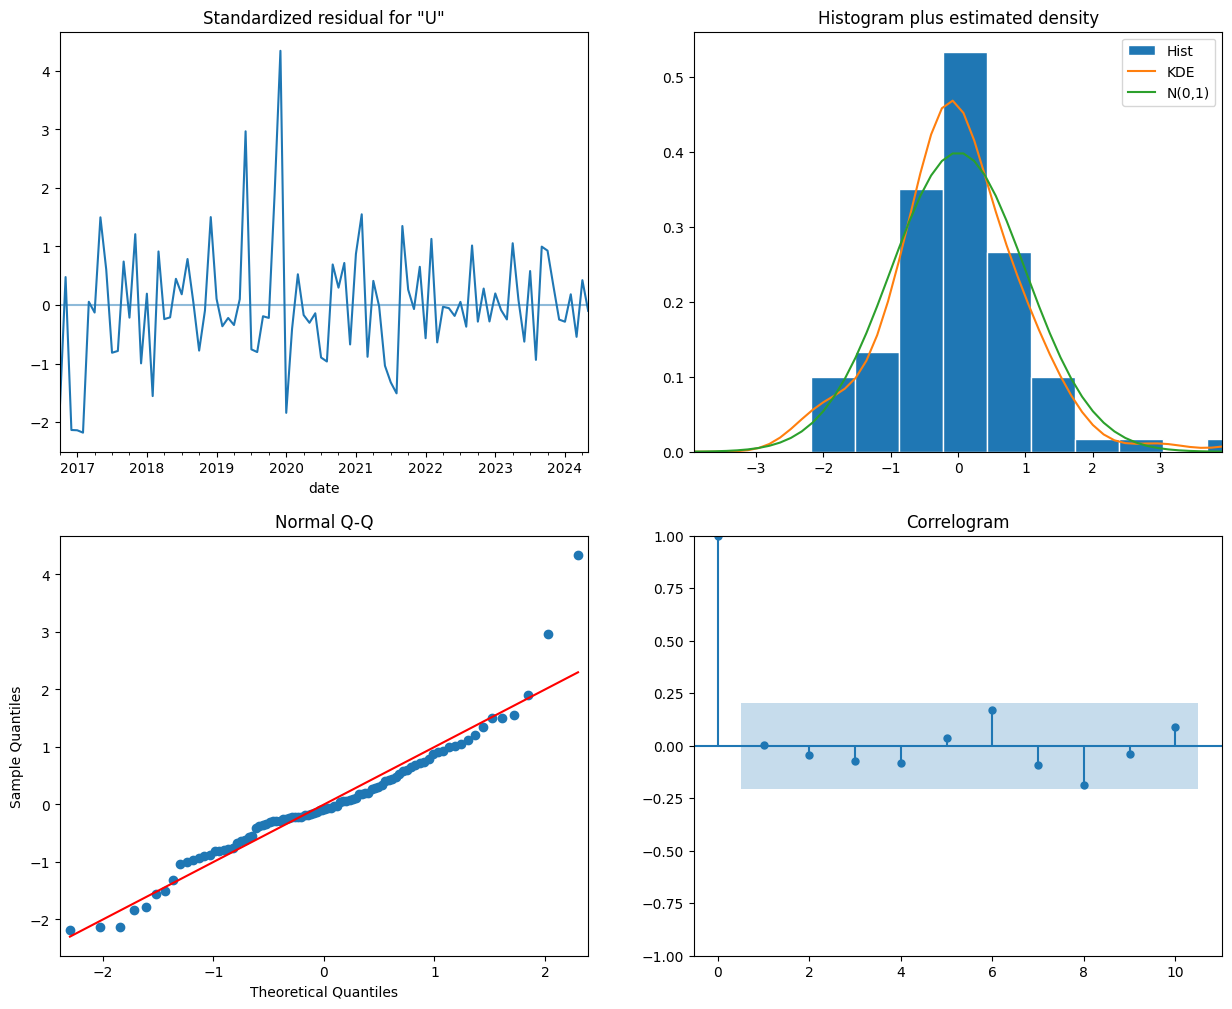

In [63]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

**According to the qualitative analysis, residuals perfectly resemble the white noise.**

### **Ljung Box Test**

In [64]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,0.133853,0.714470
2,0.138034,0.933311
3,0.267100,0.966092
4,0.402683,0.982257
5,0.529836,0.990990
6,0.530693,0.997445
7,0.535184,0.999307
8,0.566367,0.999786
9,0.571649,0.999946
10,0.588859,0.999986


**Ljung box test confirms that model is ready for forecasting.**

In [65]:
# Predict on training data (in-sample fit)
train_preds = model_fit.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = model_fit.forecast(steps=len(test))


In [66]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['Urd'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['Urd'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted Urd Prices (Train & Test)',
    xaxis_title='Date',
    yaxis_title='Urd Price Index'
)

fig.show()


### **Forecasting for a year by ARIMA(1,1,1) Model**

In [67]:
# forecasting for a year by arima
start_date = pd.to_datetime("2024-11-01")
date_range = pd.date_range(start=start_date, periods=12, freq="MS")

model = ARIMA(df['Urd'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=11)
forecast_df = forecast.predicted_mean
forecast_df["Date"] = date_range
#forecast_df.set_index("Date", inplace=True)
forecast_df.index = date_range

forecast_df.head(11)

,predicted_mean
2024-11-01,208.520732
2024-12-01,209.028432
2025-01-01,209.447107
2025-02-01,209.792367
2025-03-01,210.077086
2025-04-01,210.311879
2025-05-01,210.505501
2025-06-01,210.665171
2025-07-01,210.796843
2025-08-01,210.905427


In [68]:
# graphical representation of forecasts with time stamps
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df, mode='lines', name='Observed'))
#fig.add_trace(go.Scatter(x=["11",'12','1','2','3','4','5','6','7','8','9','10'], y=m.fittedvalues, mode='lines', name='Predicted'))
fig.update_layout(title='Predicted Urd Price Indices', xaxis_title='Date', yaxis_title='Urd')
fig.show()

# **Multivariate Time Series Analysis**

In [69]:
import plotly.graph_objects as go

fig = go.Figure()
for col in ['Arhar', 'Moong', 'Gram', 'Pea',"Masur","Urd"]:
    fig.add_trace(go.Scatter(x=df.index, y=df[col], name=col))

fig.update_layout(title='Pulses Price Indices Over Time', xaxis_title='Date', yaxis_title='Price Index')
fig.show()

In [70]:
df.corr()

,Arhar,Urd,Masur,Pea,Moong,Gram,Arhar_diff,Urd_diff
Arhar,1.000000,0.854545,0.891364,0.686459,0.895097,0.397765,0.180922,0.102241
Urd,0.854545,1.000000,0.883170,0.741776,0.941244,0.441217,0.012382,-0.012159
Masur,0.891364,0.883170,1.000000,0.713429,0.893446,0.439572,0.075510,-0.043426
Pea,0.686459,0.741776,0.713429,1.000000,0.894146,-0.163123,0.348662,0.397603
Moong,0.895097,0.941244,0.893446,0.894146,1.000000,0.211311,0.195051,0.173615
Gram,0.397765,0.441217,0.439572,-0.163123,0.211311,1.000000,-0.416139,-0.572572
Arhar_diff,0.180922,0.012382,0.075510,0.348662,0.195051,-0.416139,1.000000,0.645946
Urd_diff,0.102241,-0.012159,-0.043426,0.397603,0.173615,-0.572572,0.645946,1.000000


In [71]:
df_diff=df.diff().dropna()

### **Granger Causality Test**

In [72]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

def get_granger_pvalues(data, cause, effect, maxlag=5):
    """
    Returns a DataFrame of p-values from Granger causality tests.

    Parameters:
    - data: pandas DataFrame with the time series
    - cause: column name of the causing variable (X)
    - effect: column name of the affected variable (Y)
    - maxlag: max number of lags to test

    Returns:
    - DataFrame of p-values for each lag
    """
    result = grangercausalitytests(data[[effect, cause]], maxlag=maxlag, verbose=False)
    pvals = []
    for lag in range(1, maxlag+1):
        pval = result[lag][0]['ssr_ftest'][1]  # F-test p-value
        pvals.append({'Lag': lag, 'p-value': round(pval, 4)})

    return pd.DataFrame(pvals)


#### **Arhar**

In [73]:
for col in ['Pea','Masur','Moong','Urd','Gram']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Arhar', maxlag=4))


Pea
   Lag  p-value
0    1   0.9566
1    2   0.6085
2    3   0.4903
3    4   0.2657
Masur
   Lag  p-value
0    1   0.7828
1    2   0.8808
2    3   0.9916
3    4   0.5612
Moong
   Lag  p-value
0    1   0.9375
1    2   0.9888
2    3   0.7254
3    4   0.1057
Urd
   Lag  p-value
0    1   0.4671
1    2   0.5310
2    3   0.4106
3    4   0.1765
Gram
   Lag  p-value
0    1   0.1583
1    2   0.0157
2    3   0.0490
3    4   0.2598


**Gram granger causes Arhar(for lags 1,3,4).**

#### **Urd**

In [74]:
for col in ['Pea','Masur','Moong','Arhar','Gram']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Urd', maxlag=4))


Pea
   Lag  p-value
0    1   0.0784
1    2   0.1949
2    3   0.1897
3    4   0.0813
Masur
   Lag  p-value
0    1   0.5044
1    2   0.6728
2    3   0.5941
3    4   0.8425
Moong
   Lag  p-value
0    1   0.8425
1    2   0.3989
2    3   0.4056
3    4   0.7752
Arhar
   Lag  p-value
0    1   0.1704
1    2   0.2205
2    3   0.2590
3    4   0.4955
Gram
   Lag  p-value
0    1   0.1533
1    2   0.0234
2    3   0.0325
3    4   0.0737


**Gram granger causes Urd.**

#### **Masur**

In [75]:
for col in ['Pea','Urd','Moong','Arhar','Gram']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Masur', maxlag=4))


Pea
   Lag  p-value
0    1   0.2146
1    2   0.5695
2    3   0.5369
3    4   0.4245
Urd
   Lag  p-value
0    1   0.0104
1    2   0.0707
2    3   0.1914
3    4   0.1032
Moong
   Lag  p-value
0    1   0.9489
1    2   0.4063
2    3   0.7826
3    4   0.6874
Arhar
   Lag  p-value
0    1   0.0020
1    2   0.0078
2    3   0.0075
3    4   0.0086
Gram
   Lag  p-value
0    1   0.5702
1    2   0.4661
2    3   0.0135
3    4   0.0046


**Arhar and Urd(lag 1) granger causes Masur.**

#### **Moong**

In [76]:
for col in ['Pea','Urd','Masur','Arhar','Gram']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Moong', maxlag=4))

Pea
   Lag  p-value
0    1   0.0606
1    2   0.2863
2    3   0.4009
3    4   0.1838
Urd
   Lag  p-value
0    1   0.0000
1    2   0.0002
2    3   0.0002
3    4   0.0007
Masur
   Lag  p-value
0    1   0.0793
1    2   0.2721
2    3   0.5214
3    4   0.8743
Arhar
   Lag  p-value
0    1   0.0008
1    2   0.0055
2    3   0.0080
3    4   0.0402
Gram
   Lag  p-value
0    1   0.9361
1    2   0.2339
2    3   0.0242
3    4   0.0121


**Urd and Arhar(lag 1,3,4) ganger causes Moong.**

#### **Pea**

In [77]:
for col in ['Moong','Urd','Masur','Arhar','Gram']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Pea', maxlag=4))

Moong
   Lag  p-value
0    1   0.3604
1    2   0.8704
2    3   0.9596
3    4   0.8284
Urd
   Lag  p-value
0    1   0.1204
1    2   0.3799
2    3   0.5536
3    4   0.6119
Masur
   Lag  p-value
0    1   0.0698
1    2   0.2889
2    3   0.4177
3    4   0.5725
Arhar
   Lag  p-value
0    1   0.6617
1    2   0.7994
2    3   0.9626
3    4   0.9500
Gram
   Lag  p-value
0    1   0.3287
1    2   0.4555
2    3   0.3416
3    4   0.3862


**Urd and Masur ganger causes Pea at lag 1 only.**

#### **Gram**

In [78]:
for col in ['Moong','Urd','Masur','Arhar','Pea']:
    print(col)
    print(get_granger_pvalues(df_diff, cause=col, effect='Gram', maxlag=4))

Moong
   Lag  p-value
0    1   0.0222
1    2   0.0073
2    3   0.0151
3    4   0.0074
Urd
   Lag  p-value
0    1   0.0970
1    2   0.0000
2    3   0.0042
3    4   0.0011
Masur
   Lag  p-value
0    1   0.1283
1    2   0.0033
2    3   0.0055
3    4   0.0105
Arhar
   Lag  p-value
0    1   0.0012
1    2   0.0000
2    3   0.0055
3    4   0.0082
Pea
   Lag  p-value
0    1   0.5033
1    2   0.2812
2    3   0.4919
3    4   0.7992


**Arhar granger causes Gram(for lags 1,3,4).**



1.   **Arhar and Gram have bidirectional relationship**.
2.   **Urd and Arhar(lag 1,3,4) ganger causes Moong.**


3.   **Arhar and Urd(lag 1) granger causes Masur.**
4.   **Urd and Masur ganger causes Pea at lag 1 only.**





**Therefore we will use VAR(p) model for Arhar and Gram & ARIMAX for the rest.**

## **Fitting VAR(p) Model**

**For two time series, the Var(p) model is given by :-**

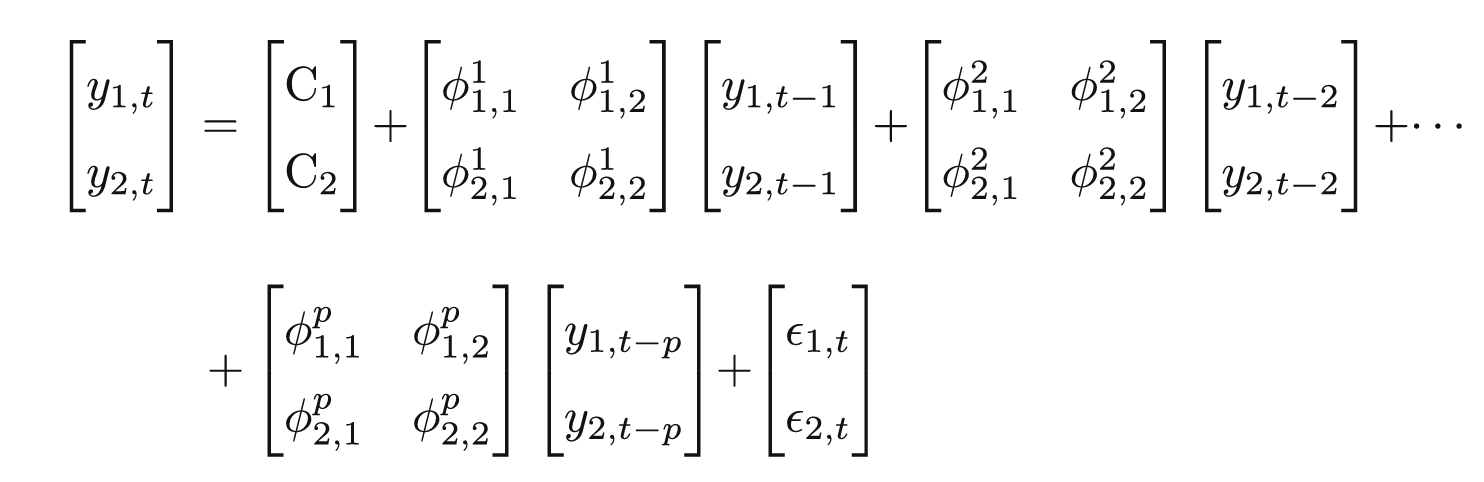

In [79]:
df1=df[["Arhar","Gram"]]

In [80]:
from statsmodels.tsa.stattools import adfuller
for col in df1.columns:
    result = adfuller(df1[col])
    print(f"{col}: p-value = {result[1]}")

Arhar: p-value = 0.8914305201006965
Gram: p-value = 0.9829739268168898


**p values indicates that both series are Non-Stationary.**

### **Differencing**

In [81]:
df2=df1.diff().dropna()

In [82]:
from statsmodels.tsa.stattools import adfuller
for col in df2.columns:
    result = adfuller(df2[col])
    print(f"{col}: p-value = {result[1]}")

Arhar: p-value = 1.059900062684246e-05
Gram: p-value = 0.04464059014419141


**Now, at 10% level of significance, both series are stationary.**


---


**Why at 10% : Because we would not find causality if we differentiate multiple times**

**We know that the diff series of Gram Granger Causes Arhar at lags 1,3 & 4 & the vice versa, hence fitting VAR model**

In [83]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

# Optional: suppress convergence warnings
warnings.simplefilter("ignore", ConvergenceWarning)

# Set maximum values to try
max_p = 4

# Store results
aic_results = []
bic_results = []

# Grid search over p and q
for p in range(1, max_p + 1):

        try:
            model = VARMAX(df2, order=(p, 0))
            result = model.fit(disp=False)
            aic_results.append((p, 0, result.aic))
            bic_results.append((p, 0, result.bic))
            print(f"(p={p}, q=0) AIC: {result.aic:.2f}, BIC: {result.bic:.2f}")
        except Exception as e:
            print(f"(p={p}, q=0) failed: {e}")


(p=1, q=0) AIC: 1225.68, BIC: 1248.85
(p=2, q=0) AIC: 1224.22, BIC: 1257.69
(p=3, q=0) AIC: 1207.76, BIC: 1251.53
(p=4, q=0) AIC: 1206.88, BIC: 1260.95


In [84]:
final_model = VARMAX(df2, order=(1, 0))
results = final_model.fit(disp=False)
print(results.summary())


                           Statespace Model Results                           
Dep. Variable:      ['Arhar', 'Gram']   No. Observations:                   97
Model:                         VAR(1)   Log Likelihood                -603.839
                          + intercept   AIC                           1225.678
Date:                Sat, 16 Aug 2025   BIC                           1248.851
Time:                        05:03:32   HQIC                          1235.048
Sample:                    10-01-2016                                         
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.05, 0.01   Jarque-Bera (JB):        17.62, 771.23
Prob(Q):                        0.82, 0.91   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.73, 0.12   Skew:                      -0.10, 1.71
Prob(H) (two-sided):            0.13,

### **Diagnostics for Arhar**

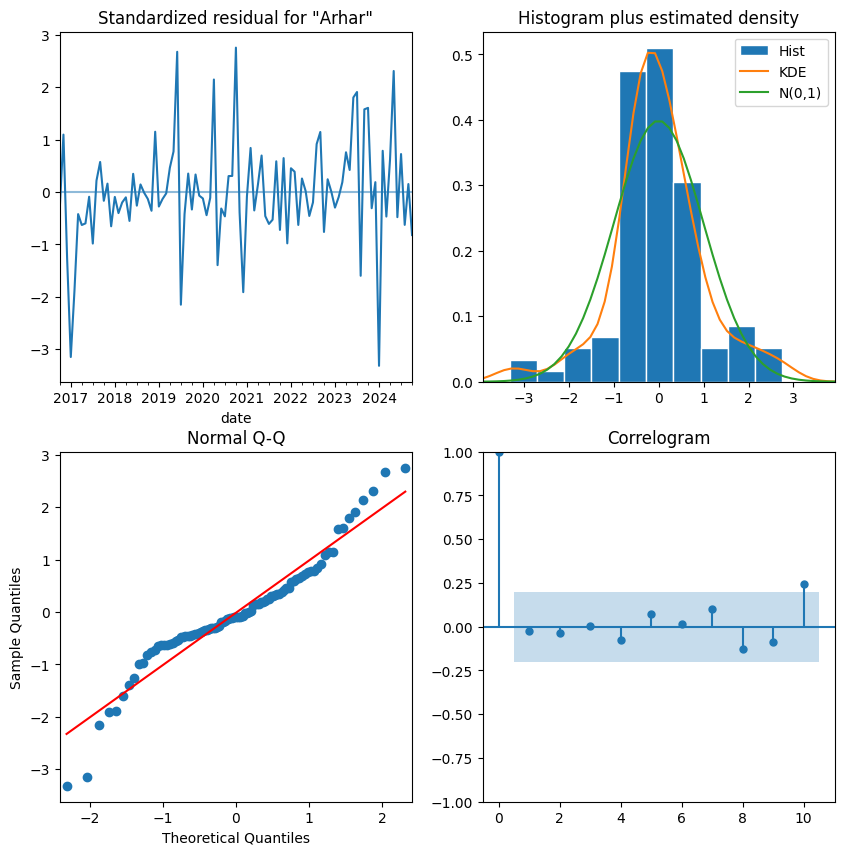

In [85]:
fig = results.plot_diagnostics(figsize=(10, 10), variable=0)
plt.show()


In [86]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.resid['Arhar'],lags=10)

,lb_stat,lb_pvalue
1,0.052599,0.818602
2,0.176073,0.915727
3,0.182473,0.980368
4,0.737379,0.946641
5,1.269756,0.938013
6,1.297353,0.971803
7,2.394194,0.934851
8,4.122283,0.845925
9,4.931811,0.840211
10,11.357165,0.330377


**Residuals of Arhar are not correlated and independent, just like white noise.**

### **Diagnostics for Gram**

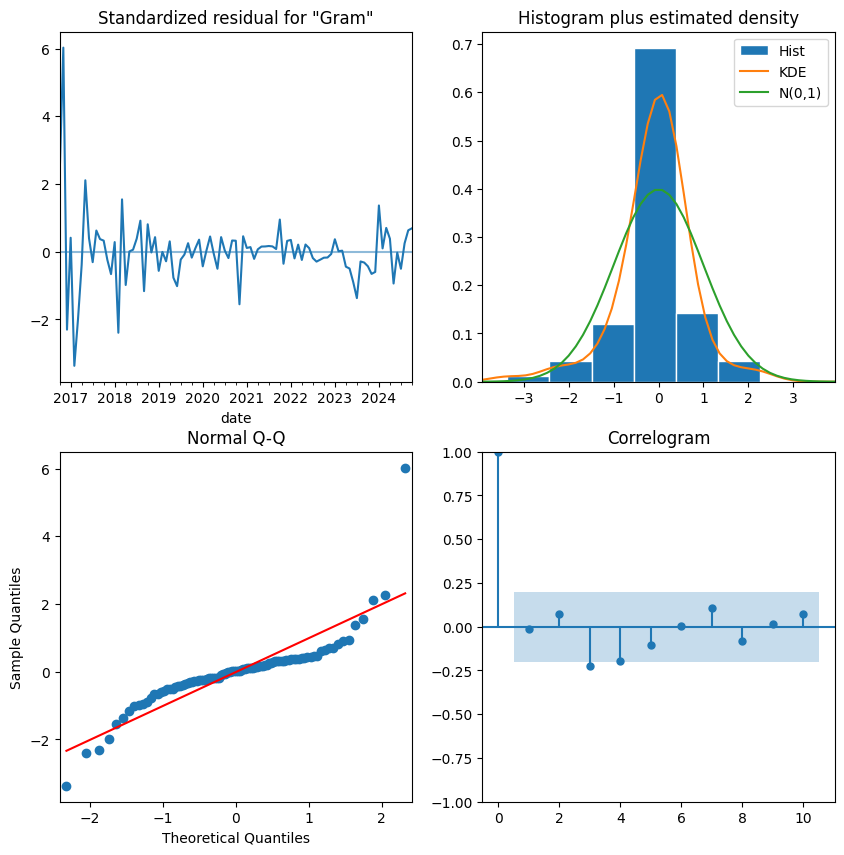

In [87]:
fig = results.plot_diagnostics(figsize=(10, 10), variable=1)
plt.show()

In [88]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.resid['Gram'],lags=10)

,lb_stat,lb_pvalue
1,0.144250,0.704092
2,0.152381,0.926640
3,8.620174,0.034791
4,11.936970,0.017826
5,13.816762,0.016816
6,13.878501,0.031023
7,14.626141,0.041102
8,16.077819,0.041280
9,16.077843,0.065274
10,17.089646,0.072404


**Residuals of Gram are not correlated and independent, just like white noise.**

In [89]:
n_forecast = 6  # Forecast next 12 time steps
forecast = results.get_forecast(steps=n_forecast)
forecast_df = forecast.predicted_mean

# Concatenate last original value with forecasted differences
last_actual = df1.iloc[-1]
forecast_reversed = pd.DataFrame(columns=forecast_df.columns)

for col in forecast_df.columns:
    forecast_reversed[col] = forecast_df[col].cumsum() + last_actual[col]



In [90]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot actual data
for col in df1.columns:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[col], name=f"Actual - {col}"))

# Plot forecasted data
forecast_index = pd.date_range(start=df1.index[-1], periods=n_forecast+1, freq='MS')[1:]

for col in forecast_reversed.columns:
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast_reversed[col], name=f"Forecast - {col}", line=dict(dash='dash')))

fig.update_layout(title='Actual vs Forecasted Pulse Indices',
                  xaxis_title='Date', yaxis_title='Price Index')
fig.show()


# **ARIMAX Models**

In [91]:
df

,Arhar,Urd,Masur,Pea,Moong,Gram,Arhar_diff,Urd_diff
date,,,,,,,,
2016-09-01,194.169457,216.338556,181.843289,159.988878,147.811033,221.874261,-29.456478,-14.631458
2016-10-01,193.007073,208.151291,180.830088,152.156675,149.926045,236.739669,-1.162384,-8.187266
2016-11-01,196.622925,204.781339,177.386602,153.412868,147.789005,279.485424,3.615852,-3.369952
2016-12-01,187.941415,193.962837,176.344135,152.402999,145.082043,283.962691,-8.681510,-10.818502
2017-01-01,166.179839,180.103285,172.706118,147.114283,140.049311,278.086972,-21.761576,-13.859552
...,...,...,...,...,...,...,...,...
2024-06-01,258.002229,203.417441,200.360280,256.989846,181.146412,187.869116,5.453402,2.451101
2024-07-01,265.040621,203.492264,199.880952,257.479599,177.933473,189.728768,7.038392,0.074823
2024-08-01,266.233694,206.759887,200.248280,255.521752,179.725994,192.946894,1.193072,3.267623


###**Pea Price Index Forecasting**

In [92]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Your endogenous and exogenous variables
y = df['Pea']
X = df[['Urd', 'Masur']]

# Ensure index is datetime
y.index = pd.to_datetime(y.index)
X.index = y.index

results_list = []

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(endog=y, exog=X, order=(p,1,q))
            fitted_model = model.fit()
            results_list.append({'p': p, 'q': q, 'AIC': fitted_model.aic})
        except:
            continue

# Show all results in a dataframe
aic_df = pd.DataFrame(results_list)
aic_df.sort_values(by='AIC', inplace=True)
print(aic_df)


    p  q         AIC
5   1  1  554.030562
6   1  2  555.597318
9   2  1  555.666572
12  3  0  556.563640
15  3  3  556.784505
7   1  3  557.248285
13  3  1  557.371154
10  2  2  557.376849
8   2  0  557.465305
11  2  3  558.266708
4   1  0  558.623173
3   0  3  558.796144
14  3  2  559.220671
2   0  2  559.262159
1   0  1  559.444258
0   0  0  559.737723


In [93]:
best_model = ARIMA(endog=y, exog=X, order=(1,1,1)).fit()
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                    Pea   No. Observations:                   98
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -272.015
Date:                Sat, 16 Aug 2025   AIC                            554.031
Time:                        05:03:35   BIC                            566.904
Sample:                    09-01-2016   HQIC                           559.236
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Urd            0.1843      0.129      1.433      0.152      -0.068       0.436
Masur          0.2640      0.262      1.007      0.314      -0.250       0.778
ar.L1          0.9069      0.123      7.388      0.0

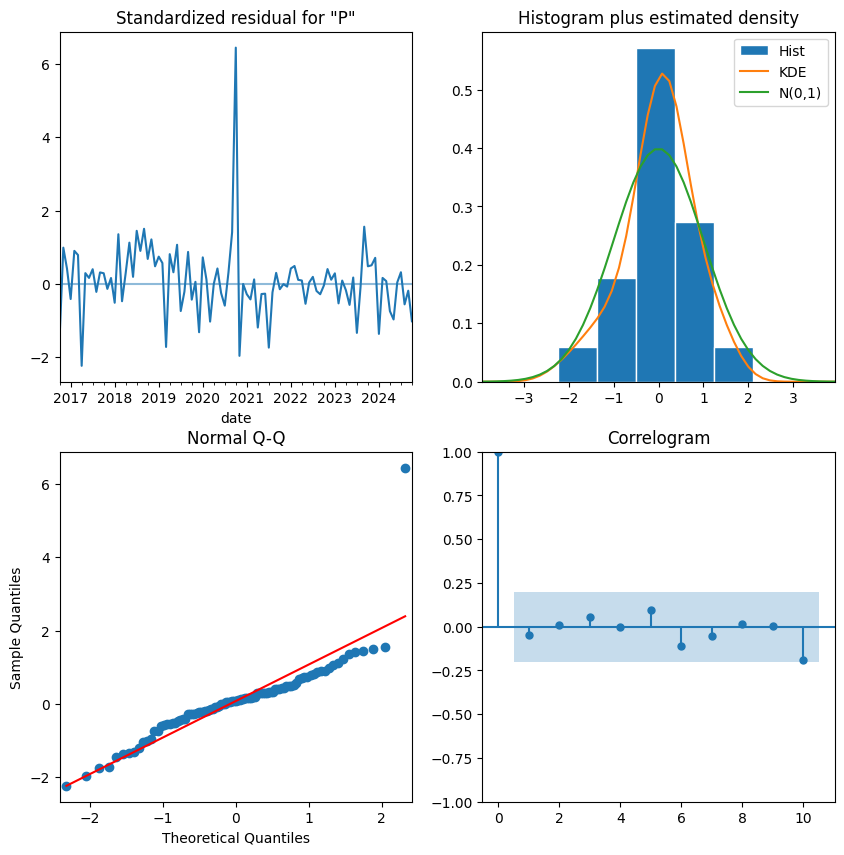

In [94]:
import matplotlib.pyplot as plt

best_model.plot_diagnostics(figsize=(10, 10))
plt.show()


In [95]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(best_model.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,0.652139,0.419349
2,0.821304,0.663218
3,0.892622,0.827208
4,0.946350,0.917819
5,1.270517,0.937936
6,1.271895,0.973185
7,2.686430,0.912417
8,2.695892,0.951970
9,2.696145,0.975135
10,2.824109,0.985266


**Residuals of Pea are not correlated and independent, just like white noise.**

In [96]:
# Forecast next 6 points
forecast_steps = 6
exog_future = X[-forecast_steps:]

forecast = best_model.predict(start=len(y),
                              end=len(y)+forecast_steps-1,
                              exog=exog_future,
                              typ='levels')


In [97]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=y.index[-90:], y=y[-90:], name='Actual Pea'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast,
                         name='Forecasted Pea', line=dict(dash='dash')))
fig.update_layout(title='Pea Price Index Forecast using ARIMAX',
                  xaxis_title='Date', yaxis_title='Price Index')
fig.show()


### **Masur Price Index Forecasting**

In [98]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Your endogenous and exogenous variables
y = df['Masur']
X = df[['Urd', 'Arhar']]

# Ensure index is datetime
y.index = pd.to_datetime(y.index)
X.index = y.index

results_list = []

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(endog=y, exog=X, order=(p,1,q))
            fitted_model = model.fit()
            results_list.append({'p': p, 'q': q, 'AIC': fitted_model.aic})
        except:
            continue

# Show all results in a dataframe
aic_df = pd.DataFrame(results_list)
aic_df.sort_values(by='AIC', inplace=True)
print(aic_df)

    p  q         AIC
7   1  3  410.695842
11  2  3  412.419159
13  3  1  413.391701
12  3  0  413.484749
3   0  3  414.043074
15  3  3  414.153707
14  3  2  414.164460
5   1  1  416.131735
10  2  2  416.399041
6   1  2  417.958070
1   0  1  421.022165
9   2  1  421.147323
4   1  0  421.213241
2   0  2  422.430382
0   0  0  422.615979
8   2  0  423.169341


In [99]:
best_model = ARIMA(endog=y, exog=X, order=(1,1,3)).fit()
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Masur   No. Observations:                   98
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -198.348
Date:                Sat, 16 Aug 2025   AIC                            410.696
Time:                        05:03:38   BIC                            428.719
Sample:                    09-01-2016   HQIC                           417.983
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Urd            0.1518      0.055      2.776      0.005       0.045       0.259
Arhar          0.1220      0.034      3.557      0.000       0.055       0.189
ar.L1          0.4793      0.155      3.097      0.0

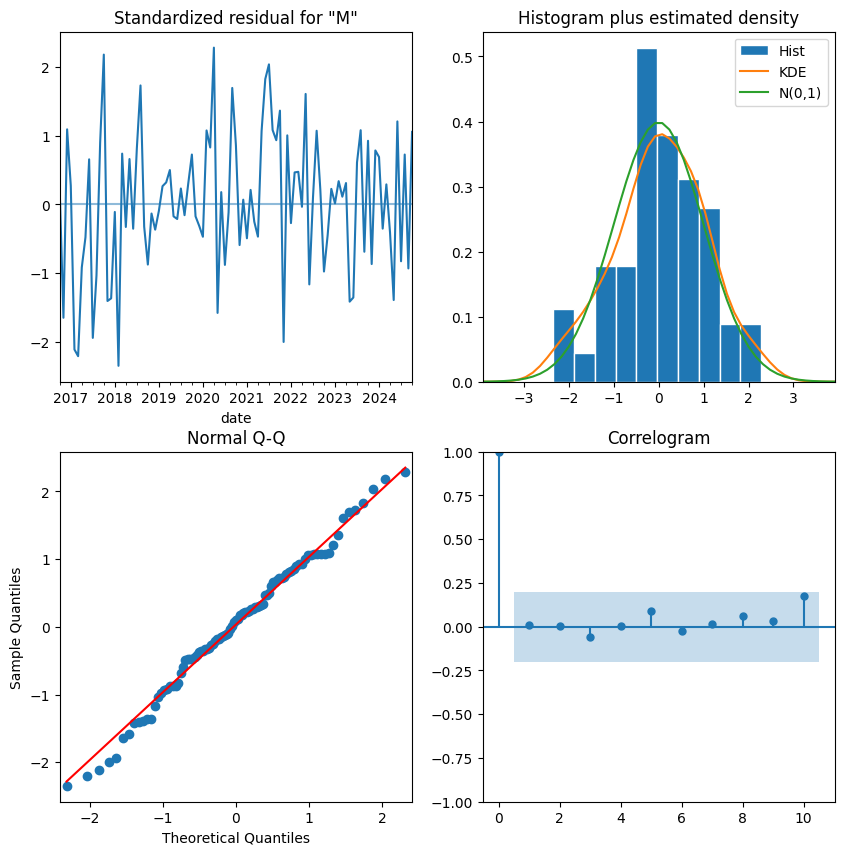

In [100]:
import matplotlib.pyplot as plt

best_model.plot_diagnostics(figsize=(10, 10))
plt.show()


In [101]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(best_model.resid, lags=10)
lb_test


,lb_stat,lb_pvalue
1,0.000681,0.979182
2,0.079891,0.960842
3,0.105879,0.991123
4,0.106989,0.998619
5,0.206187,0.999046
6,0.338445,0.999288
7,0.364041,0.999808
8,0.370928,0.999957
9,0.378058,0.999991
10,0.460452,0.999996


**Residuals of Pea are not correlated and independent, just like white noise.**

In [102]:
# Forecast next 6 points
forecast_steps = 6
exog_future = X[-forecast_steps:]

forecast = best_model.predict(start=len(y),
                              end=len(y)+forecast_steps-1,
                              exog=exog_future,
                              typ='levels')


In [103]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=y.index[-90:], y=y[-90:], name='Actual Masur'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast,
                         name='Forecasted Masur', line=dict(dash='dash')))
fig.update_layout(title='Masur Price Index Forecast using ARIMAX',
                  xaxis_title='Date', yaxis_title='Price Index')
fig.show()

### **Moong Price Index Forecasting**

In [104]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Your endogenous and exogenous variables
y = df['Moong']
X = df[['Urd', 'Arhar']]

# Ensure index is datetime
y.index = pd.to_datetime(y.index)
X.index = y.index

results_list = []

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(endog=y, exog=X, order=(p,1,q))
            fitted_model = model.fit()
            results_list.append({'p': p, 'q': q, 'AIC': fitted_model.aic})
        except:
            continue

# Show all results in a dataframe
aic_df = pd.DataFrame(results_list)
aic_df.sort_values(by='AIC', inplace=True)
print(aic_df)

    p  q         AIC
0   0  0  375.066071
4   1  0  376.951586
1   0  1  376.960317
5   1  1  378.275825
8   2  0  378.793223
2   0  2  378.828574
6   1  2  380.107861
9   2  1  380.128853
12  3  0  380.349093
3   0  3  380.440546
10  2  2  380.535354
15  3  3  380.788750
7   1  3  381.862761
13  3  1  381.941835
11  2  3  383.813064
14  3  2  383.818782


In [105]:
best_model = ARIMA(endog=y, exog=X, order=(2,1,3)).fit()
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Moong   No. Observations:                   98
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -183.907
Date:                Sat, 16 Aug 2025   AIC                            383.813
Time:                        05:03:42   BIC                            404.411
Sample:                    09-01-2016   HQIC                           392.142
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Urd            0.3752      0.050      7.508      0.000       0.277       0.473
Arhar          0.0834      0.039      2.122      0.034       0.006       0.160
ar.L1         -0.2649      1.925     -0.138      0.8

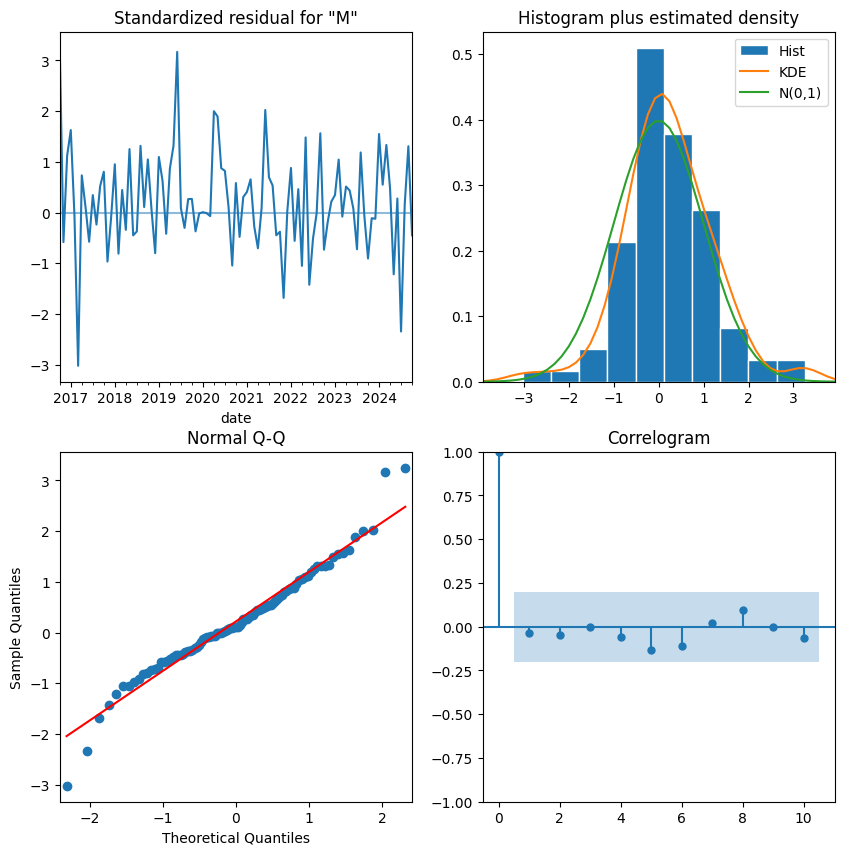

In [106]:
import matplotlib.pyplot as plt

best_model.plot_diagnostics(figsize=(10, 10))
plt.show()

In [107]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(best_model.resid, lags=10)
lb_test

,lb_stat,lb_pvalue
1,0.768126,0.380797
2,0.844796,0.655473
3,0.921385,0.820264
4,1.061858,0.900276
5,1.102286,0.953901
6,2.298693,0.890282
7,2.324768,0.939705
8,2.327106,0.969306
9,2.393306,0.983616
10,2.394115,0.992331


**Residuals of Pea are not correlated and independent, just like white noise, therefore model is ready for forecasting.**

In [108]:
# Forecast next 6 points
forecast_steps = 6
exog_future = X[-forecast_steps:]

forecast = best_model.predict(start=len(y),
                              end=len(y)+forecast_steps-1,
                              exog=exog_future,
                              typ='levels')

In [109]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=y.index[-90:], y=y[-90:], name='Actual Moong'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast,
                         name='Forecasted Moong', line=dict(dash='dash')))
fig.update_layout(title='Moong Price Index Forecast using ARIMAX',
                  xaxis_title='Date', yaxis_title='Price Index')
fig.show()